# Importing all the libraries

In [1]:
import tensorflow as tf
import keras

## Setting up the directory for images

In [2]:
%cd D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\archive\\images

D:\ML DL AI DSBDA\Railway Track Fault Detection\archive\images


In [3]:
from imutils import paths
from pathlib import Path

In [4]:
defectiveImages = Path(r"D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective")
nonDefectiveImages = Path(r"D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective")

defective_tracks = list(paths.list_images(defectiveImages))
non_defective_tracks = list(paths.list_images(nonDefectiveImages))


In [5]:
defective_tracks[0:6]

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000102.jpg']

In [6]:
non_defective_tracks[0:6]

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000102.jpg']

In [7]:
import os

In [8]:
path = "D://ML DL AI DSBDA//Railway Track Fault Detection//Processed Images//"
files = os.listdir(path)
# list of files in path
# sort path from A-Y
files.sort()

In [9]:
print("All the available folders in the directory: \n")
for i in files:
    print(i)

All the available folders in the directory: 

Defective
Non Defective


## Image and data preprocessing

In [10]:
from tqdm import tqdm
import cv2

In [11]:
# create list of image and label
image_array=[]
label_array=[]

# loop through each file in files

for i in tqdm(range(len(files))):
# list of image in each folder
  sub_file=os.listdir(path+"/"+files[i])
# let's check length of each folder
# print(len(sub_file))
# loop through each sub folder
  for j in range(len(sub_file)):
      # path of each image
      #Example:imagepro/A/image_name1.jpg
    file_path = path + "/" + files[i] + "/" + sub_file[j]
      # read each image
    image = cv2.imread(file_path)
      # resize image by 96x96
    image = cv2.resize(image,(256,256))
      # convert BGR image to RGB image
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      # add this image at image_array
    image_array.append(image)
      # add label to label_array
      # i is number from 0 to len(files)-1
      # so we can use it as label
    label_array.append(i)


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]


In [12]:
import numpy as np

## Splitting up the data fro training and testing

In [13]:
# convert list to array
image_array = np.array(image_array)
label_array = np.array(label_array,dtype="float")
# split the dataset into test and train
from sklearn.model_selection import train_test_split
# output train imagelabel spliting size
X_train, X_test, Y_train, Y_test = train_test_split(image_array, label_array, test_size=0.15)

In [14]:
del image_array,label_array
# to free memory
import gc
gc.collect()

0

# CNN model build

In [15]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Flatten

In [16]:
INPUT_DIM = (256, 256, 3)
OUTPUT_DIM = 2

In [17]:
model = Sequential([
    Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(64,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(64,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(256,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Flatten(),
    Dense(2352,activation="relu"),
    Dropout(0.5),
    Dense(OUTPUT_DIM,activation="softmax")
       
])

In [21]:
model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 24)      672       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 24)     96        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      13888     
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0

## fitting the model in CNN

In [23]:
CNN = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 32, epochs = 20)

Epoch 1/20
11/11 [==============================] - 39s 3s/step - loss: 1.4991 - accuracy: 0.5000 - val_loss: 0.6899 - val_accuracy: 0.4828
Epoch 2/20
11/11 [==============================] - 34s 3s/step - loss: 0.6953 - accuracy: 0.5368 - val_loss: 0.6882 - val_accuracy: 0.6207
Epoch 3/20
11/11 [==============================] - 35s 3s/step - loss: 0.6922 - accuracy: 0.5337 - val_loss: 0.6862 - val_accuracy: 0.6897
Epoch 4/20
11/11 [==============================] - 37s 3s/step - loss: 0.6767 - accuracy: 0.5675 - val_loss: 0.7029 - val_accuracy: 0.4828
Epoch 5/20
11/11 [==============================] - 38s 3s/step - loss: 0.6914 - accuracy: 0.5951 - val_loss: 0.6804 - val_accuracy: 0.5172
Epoch 6/20
11/11 [==============================] - 36s 3s/step - loss: 0.6601 - accuracy: 0.6166 - val_loss: 0.6839 - val_accuracy: 0.5172
Epoch 7/20
11/11 [==============================] - 34s 3s/step - loss: 0.6302 - accuracy: 0.6718 - val_loss: 0.7093 - val_accuracy: 0.5172
Epoch 8/20
11/11 [==

## CNN training statistics

In [25]:
import matplotlib.pyplot as plt

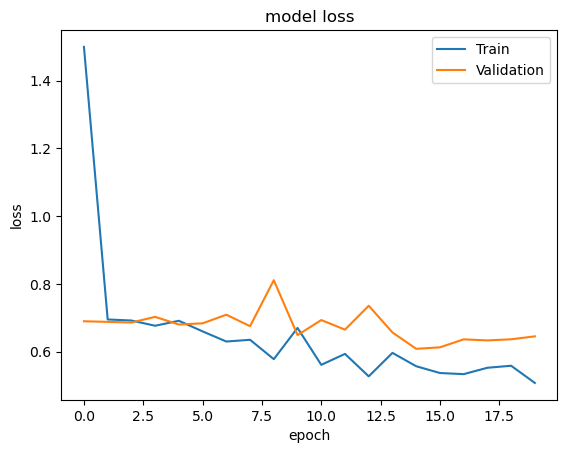

In [26]:
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

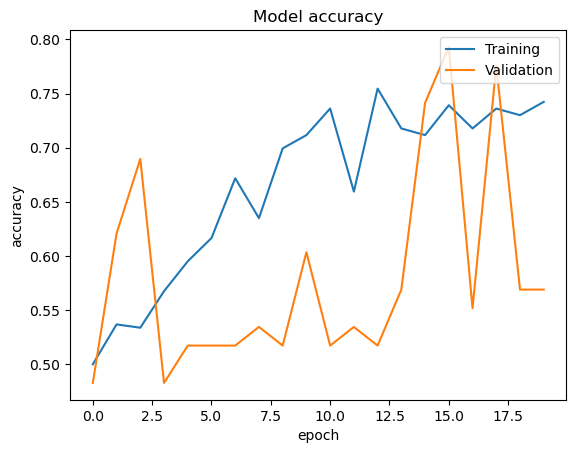

In [28]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper right')
plt.show()


In [35]:
%cd D:\\ML DL AI DSBDA\\Railway Track Fault Detection

D:\ML DL AI DSBDA\Railway Track Fault Detection


In [36]:
import os
os.mkdir("Trained Models")
model.save("Trained Models/tracks.h5")

In [37]:
prediction_val = model.predict(X_test,batch_size=32)

2/2 [==============================] - 2s 572ms/step


In [43]:
prediction_val

array([[0.5786025 , 0.42139748],
       [0.59757185, 0.40242812],
       [0.5827949 , 0.417205  ],
       [0.59566945, 0.40433058],
       [0.58690464, 0.41309538],
       [0.5543236 , 0.44567636],
       [0.6151844 , 0.38481557],
       [0.53965217, 0.4603478 ],
       [0.57113564, 0.42886436],
       [0.54140174, 0.45859826],
       [0.6113528 , 0.38864717],
       [0.5255046 , 0.47449538],
       [0.6193337 , 0.3806663 ],
       [0.5161433 , 0.48385665],
       [0.59636873, 0.40363124],
       [0.64437276, 0.3556273 ],
       [0.57798743, 0.4220126 ],
       [0.6093801 , 0.39061987],
       [0.53159946, 0.46840045],
       [0.5484276 , 0.45157242],
       [0.5199021 , 0.4800979 ],
       [0.5643893 , 0.43561068],
       [0.5597659 , 0.44023412],
       [0.6512348 , 0.34876522],
       [0.6198933 , 0.38010675],
       [0.59715366, 0.40284637],
       [0.6056333 , 0.39436665],
       [0.62458366, 0.37541634],
       [0.5416874 , 0.4583126 ],
       [0.5991494 , 0.40085056],
       [0.

In [44]:
prediction_val = prediction_val.reshape(-1, 1)

In [45]:
class_labels = ['Non-Defective', 'Defective']
predicted_labels = [class_labels[int(pred > 0.5)] for pred in prediction_val]

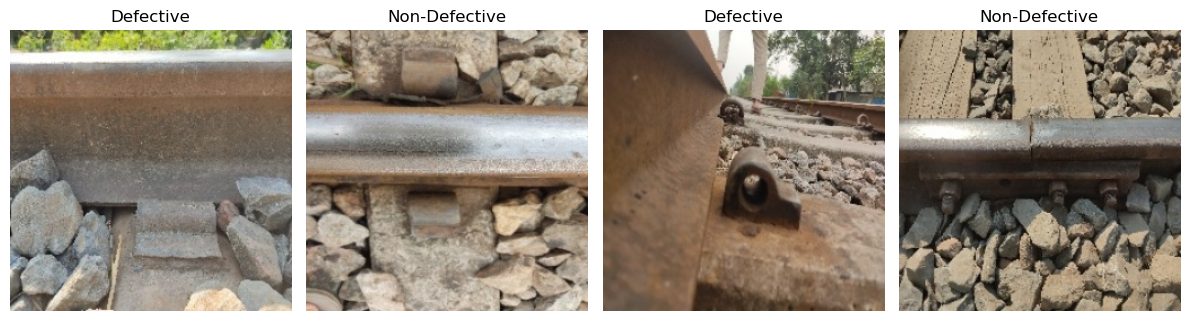

In [46]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i in range(4):
    axs[i].imshow(X_test[i])  # Assuming X_test contains image arrays
    axs[i].axis('off')
    axs[i].set_title(predicted_labels[i])

plt.tight_layout()
plt.show()